In [1]:
# Load the Titanic dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For enhanced plotting

from google.colab import files
upload = files.upload()



Saving train (1).csv to train (1).csv


In [2]:
titanic = pd.read_csv('train (1).csv')

In [3]:
# Calculate the Median Age
median_age = titanic['Age'].median()
median_age

# Fill missing values in the 'Age' column with the median age
titanic['Age'] = titanic['Age'].fillna(median_age)

# Verify that there are no more missing values in 'Age'
print(titanic['Age'].isnull().sum())  # Should print 0


0


In [4]:
# Calculate the mode of the 'Embarked' column
mode_embarked = titanic['Embarked'].mode()[0]  # Get the first mode in case there are multiple
mode_embarked # Should return 'S'


# Fill missing values in the 'Embarked' column with the mode
titanic['Embarked'] = titanic['Embarked'].fillna(mode_embarked)

# Verify that there are no more missing values in 'Embarked'
print(titanic['Embarked'].isnull().sum())  # Should print 0

0


In [5]:
# Removing variables from my data set where the missing values is more than 30%
# Remove the 'Cabin' column
titanic = titanic.drop('Cabin', axis=1)



In [6]:
# Dropping the Name column
titanic = titanic.drop('Name', axis=1)

In [7]:
# Dropping the Ticket column
titanic = titanic.drop('Ticket', axis=1)

In [8]:
print(titanic.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [9]:

# Replace 'male' and 'female' in Sex column to 0 and 1
titanic['Sex'] = titanic['Sex'].replace({'male': 0, 'female': 1})

# Replace 'S', 'C' and 'Q' in Embarked column to 0 and 1, 2
titanic['Embarked'] = titanic['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

<ipython-input-9-dee910568eba>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Sex'] = titanic['Sex'].replace({'male': 0, 'female': 1})
<ipython-input-9-dee910568eba>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Embarked'] = titanic['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [10]:
print(titanic.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         0
3            4         1       1    1  35.0      1      0  53.1000         0
4            5         0       3    0  35.0      0      0   8.0500         0


## Regression in Data Modeling
### Summary
Regression analysis is a statistical technique used to model and analyze the relationships between a dependent variable and one or more independent variables. It helps to understand how the dependent variable changes when any one of the independent variables is varied while the other variables are held constant.

### Key Types of Regression

1. Linear Regression:

Models the relationship as a straight line. It's used for predicting a continuous outcome based on one or more predictors.

2. Multiple Regression:

Extends linear regression by using multiple independent variables to predict a dependent variable.

3. Logistic Regression:

Used when the dependent variable is categorical. It models the probability of a certain class or event existing.

4. Polynomial Regression:

Fits a nonlinear relationship between the dependent and independent variables by introducing polynomial terms.

5. Ridge and Lasso Regression:

Techniques to prevent overfitting by adding penalties to the coefficients of the regression model.

### Applications
 - Predictive Analytics:

Forecasting sales, stock prices, or any continuous variable.
- Risk Assessment:

In finance, to evaluate the likelihood of default based on various factors.
- Healthcare:

Predicting patient outcomes based on demographic and clinical data.


### Advantages
1. Interpretability:

Regression models provide clear insights into the relationship between variables.
2. Flexibility:

Can be applied to various types of data and can include interaction terms.
Statistical Inference: Allows for hypothesis testing and estimation of confidence intervals.


### Limitations
1. Assumptions:

Requires several assumptions (linearity, independence, homoscedasticity, etc.) to hold true for reliable results.
2. Outliers:

Sensitive to outliers, which can skew results.
3. Multicollinearity:

High correlation between independent variables can distort the model.

In [11]:
## DATA MODELLING
#Separating dependent variables and independent variables
x = titanic[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked" ]]
y = titanic['Survived']


In [12]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0
887,888,1,1,19.0,0,0,30.0000,0
888,889,3,1,28.0,1,2,23.4500,0
889,890,1,0,26.0,0,0,30.0000,1


In [13]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split # model for training and splitting the model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  #import logistic regression model
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Splitting the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Step 2: Fitting our logistic regression
LR = LogisticRegression()
LR.fit(x_train, y_train)

# Step 3: Predicting
y_pred = LR.predict(x_test)  # Make predictions on the test set

# Step 4: Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
report = classification_report(y_test, y_pred)  # Generate classification report

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)




Accuracy: 0.8067796610169492

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       175
           1       0.80      0.70      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.80       295



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Accuracy
Accuracy: 0.8068 (or approximately 80.68%)


This means that around 80.68% of the predictions made by your logistic regression model were correct. It's a general measure of how well your model performed on the test set.
Classification Report
This report provides more detailed metrics for each class (0 for "Not Survived" and 1 for "Survived"):

## Precision:
Ratio of correctly predicted observations to the total predicted observation

### For class 0 (Not Survived): 0.81

This means that 81% of the instances predicted as
"Not Survived" were actually "Not Survived." i.e 154 out of (154+36)
= 154/190

### For class 1 (Survived): 0.80

This indicates that 80% of the instances predicted as "Survived" were indeed "Survived." i.e 84 out of (84+21)= 84/105


## Recall:
(also known as Sensitivity or True Positive Rate) is a metric that measures how well a model identifies positive cases. It is calculated as the ratio of correctly predicted positive observations to the total actual positives. In other words, recall tells us how many of the true positive cases were successfully predicted by the model.

### For class 0: 0.88
This means that out of all actual "Not Survived" instances, 88% were correctly identified by the model.
Recall(Class0)=
(TrueNegatives(TN))/[(True Negatives (TN)+False Positives (FP)]

=

(154)/(154+21)
 =0.88
### For class 1: 0.70
This indicates that out of all actual "Survived" instances, only 70% were correctly identified.
Recall(Class0)=
(TruePositives(TN))/[(True Positives (TN)+False Negatives (FP)]

 =

(84)/(84+36)
 =0.70
## F1-Score:
### For class 0: 0.84
The F1-score is the harmonic mean of precision and recall. It provides a balance between the two. For class 0, the score of 0.84 indicates a good balance between precision and recall.


### For class 1: 0.75
The F1-score for class 1 is 0.75, which suggests that while the model performs reasonably well, there is room for improvement in identifying "Survived" instances.


##Support:
### This indicates the number of actual occurrences of each class in the test set.
- For class 0: 175 instances
- For class 1: 120 instances

## Averages:
### Macro Average:

This average treats all classes equally, regardless of their size. It gives equal weight to each class's metrics.

Precision: 0.81

Recall: 0.79

F1-Score: 0.80

### Weighted Average:

This average takes into account the proportion of each class in the dataset. It gives more weight to larger classes.

Precision: 0.81

Recall: 0.81

F1-Score: 0.80




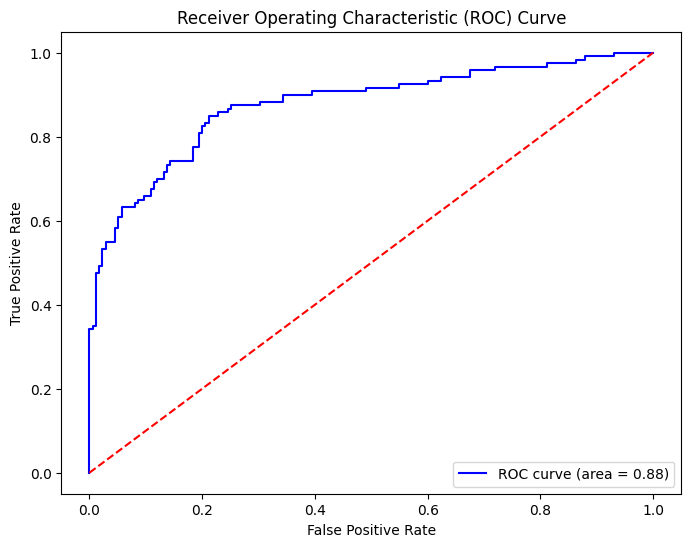

In [15]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_probs = LR.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


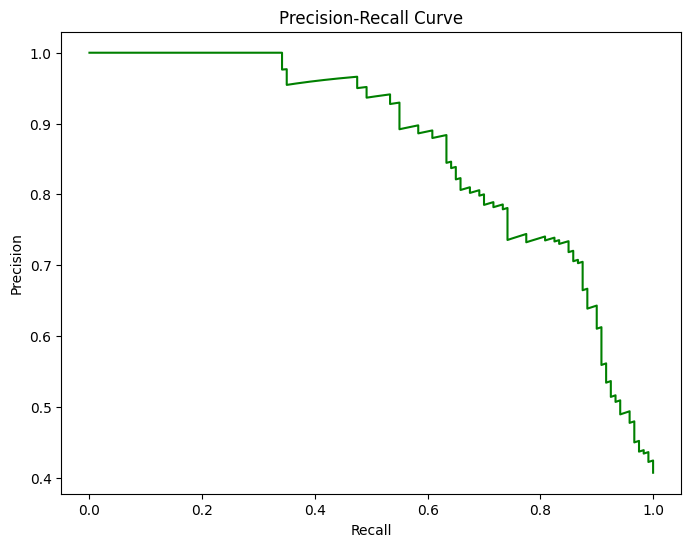

In [16]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


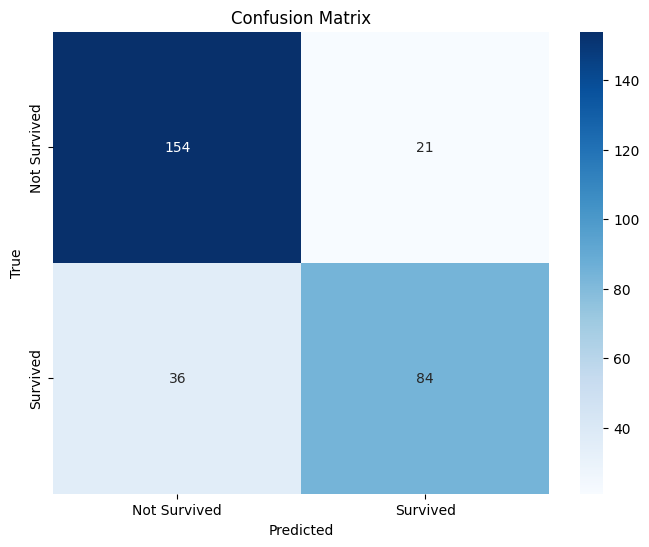

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1. Confusion Matrix

A confusion matrix provides a visual representation of the model's performance, showing the counts of true positive, true negative, false positive, and false negative predictions.


The top row represents predictions for Not Survived (0):

154: True Negatives (TN) - The model correctly predicted 154 passengers as not survived (actual 0).

21: False Positives (FP) - The model incorrectly predicted 21 passengers as not survived (actual 1).

The bottom row represents predictions for Survived (1):

36: False Negatives (FN) - The model incorrectly predicted 36 passengers as survived (actual 0).

84: True Positives (TP) - The model correctly predicted 84 passengers as survived (actual 1).


## Interpretation
True Negatives (TN = 154):

The model is good at identifying passengers who did not survive. A high TN indicates that the model successfully identifies many true cases of non-survival.
False Positives (FP = 21):

The model incorrectly predicts 21 passengers as not survived when they actually survived. This could suggest that the model is overly cautious or misclassifies some individuals who survived.
False Negatives (FN = 36):

The model incorrectly predicts 36 passengers as survived when they actually did not. This indicates that the model missed identifying some individuals who did not survive, which can be a critical issue, especially in scenarios where missing a positive case is costly (like in medical diagnoses).
True Positives (TP = 84):

The model successfully identifies 84 passengers who survived. This is a good sign, indicating that the model can recognize positive cases effectively.


##Summary
###Accuracy:
Overall, the model performs fairly well, as it has a substantial number of true predictions (both for survived and not survived).
### Trade-offs:
The confusion matrix highlights the trade-offs between sensitivity (true positive rate) and specificity (true negative rate). You may want to optimize for fewer false negatives or false positives depending on the context of your application.


